In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from statsmodels.miscmodels.ordinal_model import OrderedModel

## **PreProcess Data**
---

### Import Data

In [4]:
df = pd.read_csv("year_prediction.csv")
df['decade'] = (df['label'] // 10) * 10
display(df)

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78,decade
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327,2000
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061,2000
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345,2000
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382,2000
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052,2000
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815,2000
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364,2000
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909,2000


### Split Data

In [ ]:
df_sample = df.sample(n=5000, random_state=1)

avg_cols = [f'TimbreAvg{i}' for i in range(1, 13)]
cov_cols = [f'TimbreCovariance{i}' for i in range(1, 79)]

feature_cols = avg_cols + cov_cols
X = df_sample[feature_cols]
y = df_sample['decade']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_df = pd.DataFrame(X_train, columns=feature_cols, index=y_train.index)
X_test_df = pd.DataFrame(X_test, columns=feature_cols, index=y_test.index)

# Extract and separate average and covariance features
X_avg_train, X_avg_test = X_train[:, :12], X_test[:, :12]
X_avg_train_df = pd.DataFrame(X_avg_train, columns=avg_cols, index=y_train.index)
X_avg_test_df = pd.DataFrame(X_avg_test, columns=avg_cols, index=y_test.index)

X_cov_train, X_cov_test= X_train[:, 12:], X_test[:, 12:]
X_cov_train_df = pd.DataFrame(X_cov_train, columns=cov_cols, index=y_train.index)
X_cov_test_df = pd.DataFrame(X_cov_test, columns=cov_cols, index=y_test.index)

print("Shape of X_train & X_test:", X_train.shape, X_test.shape)
print("Shape of X_avg_train & X_avg_test:", X_avg_train.shape, X_avg_test.shape)
print("Shape of X_cov_train & X_cov_test:", X_cov_train.shape, X_cov_test.shape)

Shape of X_train & X_test: (4000, 90) (1000, 90)
Shape of X_avg_train & X_avg_test: (4000, 12) (1000, 12)
Shape of X_cov_train & X_cov_test: (4000, 78) (1000, 78)


## **Multinomial Logistic Regression**
---

### RFE on All Features:

TimbreAvg2: 0
TimbreAvg6: 1
TimbreCovariance11: 2
TimbreAvg1: 3
TimbreCovariance55: 4
TimbreCovariance18: 5
TimbreCovariance67: 6
TimbreCovariance15: 7
TimbreAvg3: 8
TimbreCovariance1: 9
TimbreCovariance2: 10
TimbreCovariance66: 11
TimbreCovariance29: 12
TimbreCovariance46: 13
TimbreCovariance48: 14
TimbreAvg4: 15
TimbreAvg8: 16
TimbreCovariance49: 17
TimbreCovariance33: 18
TimbreCovariance59: 19
TimbreCovariance31: 20
TimbreCovariance54: 21
TimbreCovariance39: 22
TimbreCovariance6: 23
TimbreCovariance44: 24
TimbreCovariance28: 25
TimbreAvg11: 26
TimbreCovariance77: 27
TimbreCovariance50: 28
TimbreCovariance7: 29
TimbreCovariance12: 30
TimbreCovariance53: 31
TimbreCovariance71: 32
TimbreCovariance36: 33
TimbreCovariance23: 34
TimbreCovariance64: 35
TimbreCovariance75: 36
TimbreAvg12: 37
TimbreAvg5: 38
TimbreCovariance9: 39
TimbreCovariance76: 40
TimbreCovariance27: 41
TimbreCovariance52: 42
TimbreCovariance32: 43
TimbreCovariance8: 44
TimbreCovariance20: 45
TimbreCovariance16: 46
Timbr

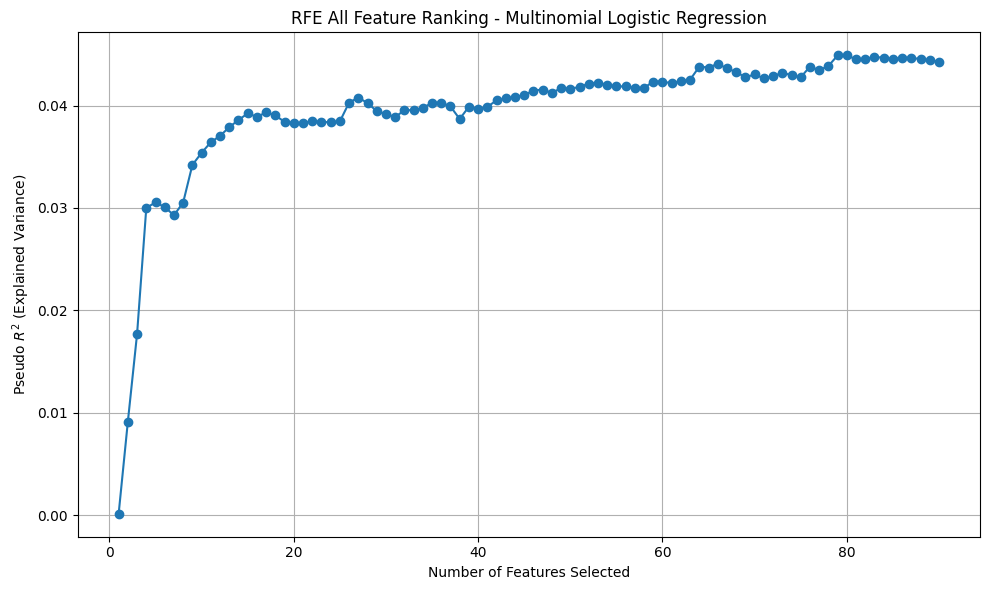

In [6]:
r2_scores = []
n_features = []
feature_ranking = []

# Step 1: Fit RFE to get feature rankings
estimator = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(estimator=estimator, n_features_to_select=1, step=1)  # rank all features
rfe.fit(X_train_df, y_train)

# Step 2: Get feature ranking order (0 = most important)
ranking_order = [feature for _, feature in sorted(zip(rfe.ranking_, X_train_df.columns))]
for i, feature in enumerate(ranking_order):
    print(f"{feature}: {i}")

# Step 3: Evaluate model as you add features in importance order
r2_scores = []
n_features = []

for i in range(1, len(ranking_order) + 1):
    selected = ranking_order[:i]

    clf = LogisticRegression(solver='lbfgs', max_iter=1000)
    clf.fit(X_train_df[selected], y_train)

    probs = clf.predict_proba(X_test_df[selected])
    expected_value = np.sum(probs * np.arange(probs.shape[1]), axis=1)

    r2_like = explained_variance_score(y_test, expected_value)
    r2_scores.append(r2_like)
    n_features.append(i)

plt.figure(figsize=(10, 6))
plt.plot(n_features, r2_scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Pseudo $R^2$ (Explained Variance)')
plt.title('RFE All Feature Ranking - Multinomial Logistic Regression')
plt.grid(True)
plt.tight_layout()
plt.show()

### RFE on TimbreAvg Features:

TimbreAvg2: 0
TimbreAvg6: 1
TimbreAvg1: 2
TimbreAvg3: 3
TimbreAvg4: 4
TimbreAvg10: 5
TimbreAvg11: 6
TimbreAvg12: 7
TimbreAvg7: 8
TimbreAvg8: 9
TimbreAvg9: 10
TimbreAvg5: 11


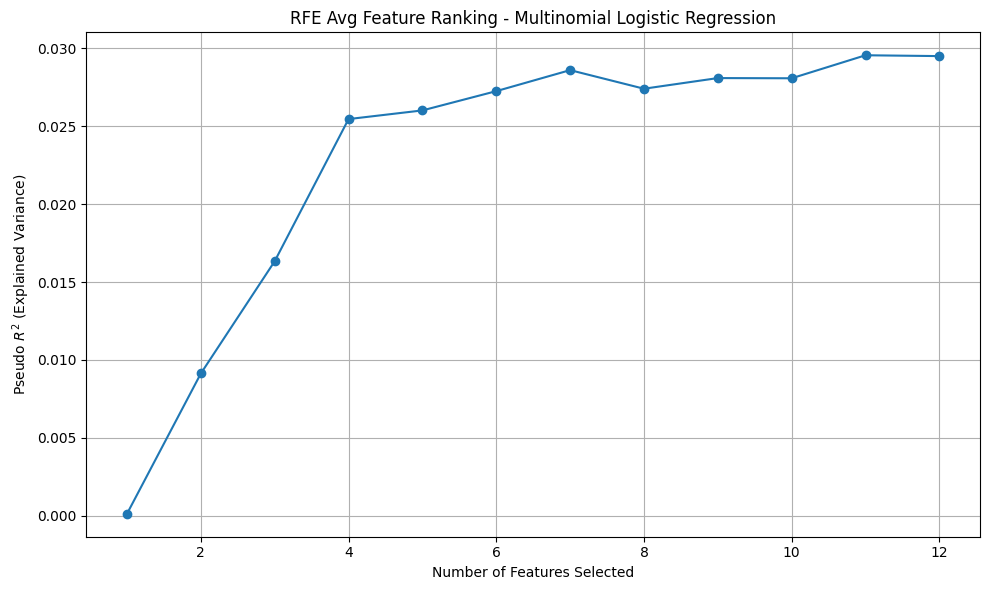

In [48]:
r2_scores = []
n_features = []
feature_ranking = []

# Step 1: Fit RFE to get feature rankings
estimator = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(estimator=estimator, n_features_to_select=1, step=1)  # rank all features
rfe.fit(X_avg_train_df, y_train)

# Step 2: Get feature ranking order (0 = most important)
ranking_order = [feature for _, feature in sorted(zip(rfe.ranking_, X_avg_train_df.columns))]
for i, feature in enumerate(ranking_order):
    print(f"{feature}: {i}")

# Step 3: Evaluate model as you add features in importance order
r2_scores = []
n_features = []

for i in range(1, len(ranking_order) + 1):
    selected = ranking_order[:i]

    clf = LogisticRegression(solver='lbfgs', max_iter=1000)
    clf.fit(X_avg_train_df[selected], y_train)

    probs = clf.predict_proba(X_avg_test_df[selected])
    expected_value = np.sum(probs * np.arange(probs.shape[1]), axis=1)

    r2_like = explained_variance_score(y_test, expected_value)
    r2_scores.append(r2_like)
    n_features.append(i)

plt.figure(figsize=(10, 6))
plt.plot(n_features, r2_scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Pseudo $R^2$ (Explained Variance)')
plt.title('RFE Avg Feature Ranking - Multinomial Logistic Regression')
plt.grid(True)
plt.tight_layout()
plt.show()

### RFE on TimbreCovariance Features:

TimbreCovariance55: 0
TimbreCovariance1: 1
TimbreCovariance71: 2
TimbreCovariance51: 3
TimbreCovariance56: 4
TimbreCovariance66: 5
TimbreCovariance76: 6
TimbreCovariance18: 7
TimbreCovariance67: 8
TimbreCovariance11: 9
TimbreCovariance15: 10
TimbreCovariance3: 11
TimbreCovariance48: 12
TimbreCovariance46: 13
TimbreCovariance7: 14
TimbreCovariance29: 15
TimbreCovariance57: 16
TimbreCovariance39: 17
TimbreCovariance6: 18
TimbreCovariance28: 19
TimbreCovariance2: 20
TimbreCovariance63: 21
TimbreCovariance33: 22
TimbreCovariance9: 23
TimbreCovariance49: 24
TimbreCovariance31: 25
TimbreCovariance44: 26
TimbreCovariance53: 27
TimbreCovariance8: 28
TimbreCovariance10: 29
TimbreCovariance41: 30
TimbreCovariance54: 31
TimbreCovariance47: 32
TimbreCovariance32: 33
TimbreCovariance52: 34
TimbreCovariance59: 35
TimbreCovariance77: 36
TimbreCovariance5: 37
TimbreCovariance17: 38
TimbreCovariance36: 39
TimbreCovariance37: 40
TimbreCovariance12: 41
TimbreCovariance40: 42
TimbreCovariance75: 43
Timbre

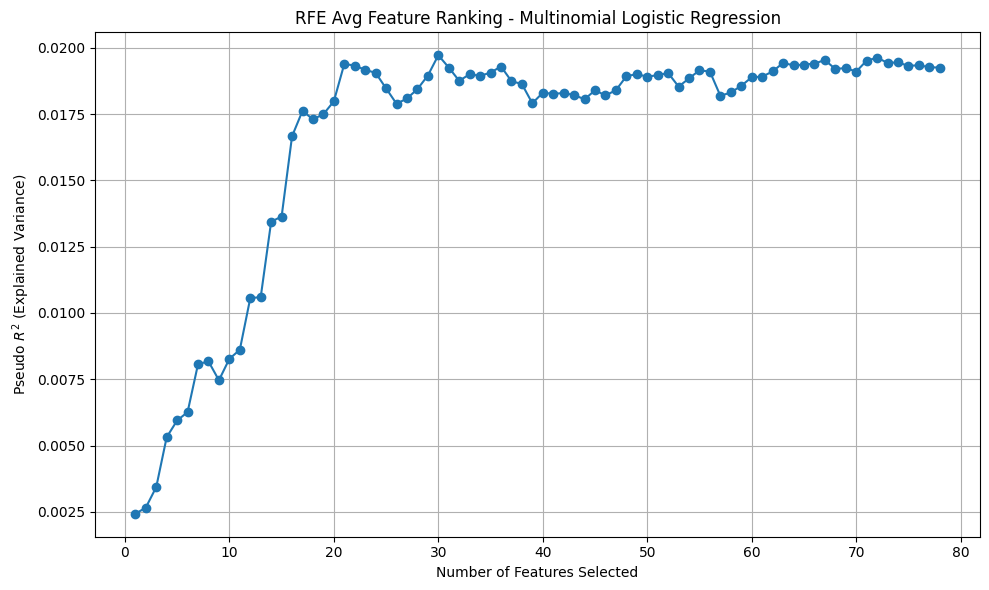

In [45]:
r2_scores = []
n_features = []
feature_ranking = []

# Step 1: Fit RFE to get feature rankings
estimator = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(estimator=estimator, n_features_to_select=1, step=1)  # rank all features
rfe.fit(X_cov_train_df, y_train)

# Step 2: Get feature ranking order (0 = most important)
ranking_order = [feature for _, feature in sorted(zip(rfe.ranking_, X_cov_train_df.columns))]
for i, feature in enumerate(ranking_order):
    print(f"{feature}: {i}")

# Step 3: Evaluate model as you add features in importance order
r2_scores = []
n_features = []

for i in range(1, len(ranking_order) + 1):
    selected = ranking_order[:i]

    clf = LogisticRegression(solver='lbfgs', max_iter=1000)
    clf.fit(X_cov_train_df[selected], y_train)

    probs = clf.predict_proba(X_cov_test_df[selected])
    expected_value = np.sum(probs * np.arange(probs.shape[1]), axis=1)

    r2_like = explained_variance_score(y_test, expected_value)
    r2_scores.append(r2_like)
    n_features.append(i)

plt.figure(figsize=(10, 6))
plt.plot(n_features, r2_scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Pseudo $R^2$ (Explained Variance)')
plt.title('RFE Avg Feature Ranking - Multinomial Logistic Regression')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Ordinal Logistic Regression**
---


Removed: TimbreAvg5, Score w/o it: 0.0274
Removed: TimbreAvg7, Score w/o it: 0.0273
Removed: TimbreAvg12, Score w/o it: 0.0271
Removed: TimbreAvg8, Score w/o it: 0.0269
Removed: TimbreAvg10, Score w/o it: 0.0262
Removed: TimbreAvg9, Score w/o it: 0.0256
Removed: TimbreAvg11, Score w/o it: 0.0239
Removed: TimbreAvg4, Score w/o it: 0.0228
Removed: TimbreAvg6, Score w/o it: 0.0204
Removed: TimbreAvg2, Score w/o it: 0.0134
Removed: TimbreAvg3, Score w/o it: 0.0063
Feature Ranking:
TimbreAvg1: 0
TimbreAvg3: 1
TimbreAvg2: 2
TimbreAvg6: 3
TimbreAvg4: 4
TimbreAvg11: 5
TimbreAvg9: 6
TimbreAvg10: 7
TimbreAvg8: 8
TimbreAvg12: 9
TimbreAvg7: 10
TimbreAvg5: 11


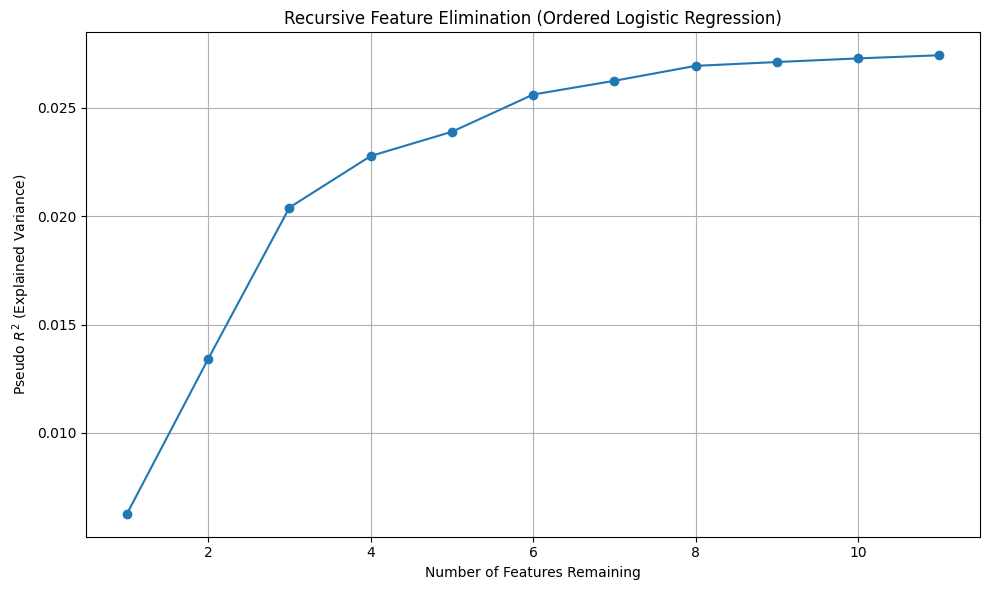

In [11]:
remaining_features = list(X_avg_train_df.columns)
feature_ranking = []
r2_scores = []

# Work with full feature set initially
while len(remaining_features) > 1:
    scores = []

    for feature in remaining_features:
        # Try leaving out one feature
        test_features = [f for f in remaining_features if f != feature]
        
        model = OrderedModel(y_train, X_avg_train_df[test_features], distr='logit')
        res = model.fit(method='bfgs', disp=False)

        probs = res.predict(X_avg_test_df[test_features])
        expected_value = np.sum(probs * np.arange(probs.shape[1]), axis=1)
        score = explained_variance_score(y_test, expected_value)

        scores.append((score, feature))

    # Identify the worst-performing feature (i.e. whose removal improved performance the least)
    worst_score, worst_feature = max(scores, key=lambda x: x[0])
    
    # Remove that feature
    remaining_features.remove(worst_feature)
    
    # Record the eliminated feature (least useful at this stage)
    feature_ranking.insert(0, worst_feature)  # insert at front so we get best-to-worst at the end
    r2_scores.append(worst_score)

    print(f"Removed: {worst_feature}, Score w/o it: {worst_score:.4f}")

# Add the last remaining feature
feature_ranking.insert(0, remaining_features[0])
print("Feature Ranking:")
for i, feature in enumerate(feature_ranking):
    print(f"{feature}: {i}")
    
# Optional: plot R² over number of remaining features
plt.figure(figsize=(10, 6))
plt.plot(list(range(len(r2_scores), 0, -1)), r2_scores, marker='o')
plt.xlabel('Number of Features Remaining')
plt.ylabel('Pseudo $R^2$ (Explained Variance)')
plt.title('Recursive Feature Elimination (Ordered Logistic Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()


## **LASSO Regression**
---

In [16]:
lasso = LassoCV(cv=5, random_state=1)
lasso.fit(X_train, y_train)

# STEP 3: See which features were selected
coef = pd.Series(lasso.coef_, index=feature_cols)

# Print features with non-zero coefficients
selected_features = coef[coef != 0]
num_features = len(selected_features)
print(f"{num_features} Selected Features by LASSO:")
print(selected_features.sort_values())

# print("\nAll coefficients:")
# print(coef.sort_values())



59 Selected Features by LASSO:
TimbreAvg2           -2.548468
TimbreAvg6           -2.545244
TimbreAvg3           -1.596796
TimbreCovariance36   -0.761977
TimbreCovariance50   -0.674694
TimbreCovariance45   -0.627442
TimbreCovariance28   -0.540054
TimbreCovariance29   -0.451607
TimbreAvg8           -0.429702
TimbreAvg5           -0.429316
TimbreAvg12          -0.420771
TimbreCovariance3    -0.341837
TimbreAvg11          -0.334822
TimbreCovariance55   -0.333422
TimbreAvg9           -0.295563
TimbreCovariance77   -0.294891
TimbreCovariance25   -0.189200
TimbreCovariance51   -0.161641
TimbreCovariance37   -0.159566
TimbreCovariance41   -0.143233
TimbreCovariance65   -0.142965
TimbreCovariance47   -0.142483
TimbreCovariance42   -0.130619
TimbreCovariance19   -0.095655
TimbreCovariance31   -0.094294
TimbreCovariance32   -0.088023
TimbreCovariance76   -0.082779
TimbreCovariance56   -0.071995
TimbreCovariance66   -0.069384
TimbreCovariance49   -0.064566
TimbreCovariance57   -0.040219
TimbreCo

In [ ]:
# Function to run LASSO with different alpha values
def lasso_feature_selection(X, y, alphas):
    feature_importances = []
    
    plt.figure(figsize=(12, 6))
    
    for alpha in alphas:
        # Fit LASSO regression
        lasso = Lasso(alpha=alpha, max_iter=10000)
        lasso.fit(X, y)
        
        # Store feature coefficients
        feature_importances.append(lasso.coef_)
        
        # Plot coefficients
        plt.plot(california.feature_names, lasso.coef_, 
                 marker='o', label=f'α = {alpha}')
    
    plt.title('LASSO Regression Coefficients for Different Penalty Strengths')
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Create DataFrame to show coefficient changes
    coef_df = pd.DataFrame(
        feature_importances, 
        columns=california.feature_names, 
        index=alphas
    )
    
    return coef_df

# Run LASSO with increasing alpha values
#alphas = [0.1, 0.5, 1.0, 2.0, 5.0]
alphas = [0.01, 0.02, 0.04, 0.08, 1.0]
lasso_coefficients = lasso_feature_selection(X_scaled, y, alphas)
print("\nLASSO Coefficients for Different Alpha Values:")
print(lasso_coefficients.round(4))


/home/stealth_black/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression Accuracy: 0.5935
